In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [ ]:
dat = yf.Ticker("MSFT")
dat.info
dat.calendar
dat.analyst_price_targets
dat.quarterly_income_stmt
dat.history(period='1mo') # 1 month of historical data
dat.option_chain(dat.options[0]).calls

In [ ]:
from data_fetch import get_price
start = '2024-01-01'
end = '2025-01-01'
prices = get_price(['AAPL', 'MSFT'], start, end)
prices

In [ ]:
#setting pandas to display floats with 2 decimal places
import pandas as pd

# Set pandas to display floats with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
prices['Close']

In [ ]:
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT']

portfolio = Portfolio()
for symbol in shares:
    portfolio.add_asset(symbol, 1)



start = '2024-01-01'
end = '2025-01-01'

prices_df = get_price(shares, start, end)
prices_close_df = prices_df['Close']

print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))
#plot_prices(prices_close_df)

In [ ]:
#1. getting data from yfinance
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from plotter import plot_prices

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])



prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)
prices_df

In [ ]:
import pandas as pd
#retrieve data from csv
prices_df = pd.read_csv('prices.csv', parse_dates=True)
prices_df

In [ ]:
fil = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    fil.append('Close'+'.'+str(i+1))
    print(fil)
#filtering the columns to get only the closing prices
prices_close_df = prices_df[fil]
prices_close_df

In [ ]:
column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new
prices_close_df


In [ ]:
#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])
prices_close_df

In [ ]:
prices_close_df.set_index('Date', inplace=True)
prices_close_df

In [ ]:
#Changing output of dataframe to float
print(portfolio.holdings['AAPL'])
print(type(float(prices_close_df['AAPL']['2024-01-02'])))
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df))


In [ ]:
value = portfolio.get_portfolio_value(prices_close_df)
value

## Visualisations for the platform

In [ ]:
#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_prices(prices_close_df)

## Making Dates Dynamic 

In [ ]:
import pandas as pd
#retrieve data from csv
prices_pdates = pd.read_csv('prices.csv', parse_dates=True)
prices_pdates = prices_pdates.drop([0, 1])
prices_pdates = prices_pdates.rename(columns={'Price': 'Date'})
prices_pdates

In [ ]:
from datetime import datetime
# prices_pdates.columns
prices_pdates_out = prices_pdates['Date']
prices_pdates_list= prices_pdates_out.tolist()
print(type(prices_pdates_list[0]))
prices_pdates_list_e1 =datetime.strptime(prices_pdates_list[0], '%Y-%m-%d') #Transform the first date to datetime object
prices_pdates_list_e1


In [ ]:
#turn values in Date column to datetime objects (PANDAS METHOD)
prices_pdates['Date_a'] = pd.to_datetime(prices_pdates['Date'])

In [ ]:
# Convert the 'Date' column to datetime objects (PYTHON METHOD)
prices_pdates['Date_ b'] = prices_pdates['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))  # Format to string

In [ ]:
# check the type of the first element in the 'Date' columns
print(type(prices_pdates['Date_a'].to_list()[0]))  # PANDAS METHOD
print(type(prices_pdates['Date_ b'].to_list()[0]))  # PYTHON METHOD

#both work. Need to change the code to use dynamic dates. 

# Backtester 1.0

In [ ]:
# Bring it all together for a 1.0 version. 
def get_closest_date_index(date, df_original):
    """
    Get the index of the closest date in a list of dates.
    Args:
        date (timestamp): The date to find the closest match for.
        date_series (pandas.Series): A pandas series of pandas.Timestamp objects.
    Returns:
        int: The index of the closest date in the list.
    """
    # getting the closest date index
    df_with_dates = df_original.copy()
    df_with_dates['timedeltas'] = abs(df_with_dates.index - date)
    min_diff = min(df_with_dates['timedeltas'])
    # Calculate the difference between the last date in the DataFrame and today
    index = df_with_dates['timedeltas'].isin([min_diff]).idxmax()
    return index
## 1. DATA FETCHING
# Example usage
from data_fetch import get_price
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices
import pandas as pd
import datetime

shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset
portfolio = Portfolio()
for i, symbol in enumerate(shares):
    portfolio.add_asset(symbol, num_shares[i])

prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#retrieve data from csv
prices_df = pd.read_csv('prices.csv')
prices_df

columns_to_filter = ['Price', 'Close']
for i,element in enumerate(shares[1:]):
    columns_to_filter.append('Close'+'.'+str(i+1))
    print(columns_to_filter)

#filtering the columns to get only the closing prices
prices_close_df = prices_df[columns_to_filter]

column_new = ['Date']
for i,element in enumerate(shares):
    column_new.append(element)
print(column_new)
prices_close_df.columns = column_new

#erase rows 0 and 1
prices_close_df = prices_close_df.drop([0, 1])

# Convert 'Date' column to datetime objects
prices_close_df['Date'] = pd.to_datetime(prices_close_df['Date'])
prices_close_df.set_index('Date', inplace=True)
print(prices_close_df)
print(type(prices_close_df.index[-1]))

#Time delat 
date = datetime.datetime.strptime("2025-06-06", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
print("Portfolio Value:", portfolio.get_portfolio_value(prices_close_df, date))


#1. basic visualization of stock prices.
#prices_close_df
prices_close_df = prices_close_df.astype(float) #turn values to float
plot_df_prices(prices_close_df)

#both work. Need to change the code to use dynamic dates. 

In [ ]:
date = datetime.datetime.strptime("2024-12-28", '%Y-%m-%d')
date = pd.Timestamp(date)  # Convert to pandas Timestamp
i = get_closest_date_index(date, prices_close_df)
i

## Creating different Portfolios to track and backtest

In [ ]:
#portfolio2
shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares_santi = [2, 3, 1, 2, 3, 5, 8] # Number of shares for each asset
num_shares_gus = [5, 5, 5, 1, 1, 5, 1]
portfolio_santi = Portfolio()
portfolio_gus = Portfolio()
for i, symbol in enumerate(shares):
    portfolio_santi.add_asset(symbol, num_shares_santi[i])
    portfolio_gus.add_asset(symbol, num_shares_gus[i])

print("Portfolio Value:", portfolio_santi.get_portfolio_value(prices_close_df, date))
print("Portfolio Value:", portfolio_gus.get_portfolio_value(prices_close_df, date))



## Plotting the portfolio values

In [ ]:
cutoff_date = datetime.datetime.strptime("2009-01-31", '%Y-%m-%d')
cutoff_date = pd.Timestamp(cutoff_date) 
# Create a new DataFrame with the same index as prices_close_df
# Get all rows after and including the cutoff_date
sliced_df = prices_close_df.loc[cutoff_date:]

portfolio_values_df = pd.DataFrame()
portfolio_values_df['Date'] = sliced_df.index
portfolio_values_df['Santi'] = portfolio_values_df['Date'].apply(lambda x: portfolio_santi.get_portfolio_value(prices_close_df, x))  # Format to string
portfolio_values_df['Gus'] = portfolio_values_df['Date'].apply(lambda x: portfolio_gus.get_portfolio_value(prices_close_df, x)) 
portfolio_values_df['Base'] = portfolio_values_df['Date'].apply(lambda x: portfolio.get_portfolio_value(prices_close_df, x)) 
# Display the new DataFrame
portfolio_values_df

In [ ]:
portfolio_values_df.set_index('Date', inplace=True)
# Plot the portfolio values
portfolio_values_df.plot()

In [ ]:
##FMP API
# PUBLIC API KEY = ?apikey=eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk
import requests
# Define the API endpoint and parameters
url = "https://financialmodelingprep.com/stable/senate-latest"
params = {
    'apikey': 'eGw4yVV5QZwCAsvqO3zZcs8dNRulA1Nk'  
}
response = requests.get(url, params=params)
# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    print(data)  # Print the data or process it as needed


In [ ]:
import pandas as pd
# Convert the JSON data to a DataFrame
df = pd.DataFrame(data)
# Display the DataFrame
df.to_csv('data/senate_data.csv', index=False)  # Save to CSV file
df.tail()  # Display the first few rows of the DataFrame

In [ ]:
#getting a list of senators for the analysis since 2020
import pandas as pd
import requests
import json
#load json data from link
url = "https://unitedstates.github.io/congress-legislators/legislators-current.json"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    df = pd.DataFrame(data)  # Convert the JSON data to a DataFrame

#need to filter data to include senators for whom we have data (2020 onwards)
#start senators_json
senators_dict={}
for senator in data:
    if senator['terms'] is not None:
        for term in senator['terms']:
            if term['type'] == 'sen' and term['end'] >= '2020-06-01':
                senators_dict[senator['id']['bioguide']] = senator

print('No. of senators: ', len(senators_dict))

#create a set of senator names
senators_set = set()
for senator in senators_dict.values():
    senators_set.add(senator['name']['official_full'])

print(senators_set)


In [ ]:
a = list(range(1, 10))
a.append(a[-1])
a

In [ ]:
a[-2] = 100
a

In [ ]:
import pandas as pd
dict = {'2025': {'aa':1, 'bb':2}, '2026': {'aa':3, 'bb':4}}
df = pd.DataFrame(dict)
df.T

## Backtester 1.1

In [8]:
# Bring it all together for a 1.1 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
print(stock_price_purchased)
portfolio = Portfolio('Gus', "M", {str(valid_date):{'AAPL': 1, 'MSFT': 1, 'GOOG': 1, 'AMZN': 1, 'TSLA': 1, 'NVDA': 1, 'NFLX': 1}}, stock_price_purchased,str(valid_date))

#test functionality
#removing an asset
valid_date = get_closest_date_index(pd.Timestamp('2025-04-30'), prices_close_df)
symbol = 'AAPL'
portfolio.remove_asset(symbol,1, str(valid_date), prices_close_df)  # Remove 1 share of AAPL at the price on the valid date


#adding a new asset
valid_date = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date)])  # Get the stock prices for the valid date
symbol = 'AAPL'
portfolio.add_asset(symbol, 1,str(valid_date), float(stock_price_purchased[symbol]))  # Add 1 share of AAPL at the price on the valid date

#print(portfolio.holdings)
print(portfolio.investment)
print(portfolio.capital_gains)


# # Calculating portfolio value for each date in the test DataFrame
val = portfolio.get_portfolio_value(prices_close_df)
cols_graph = val.columns[:-1]
val  # Remove the 'Date' column for plotting



{'AAPL': np.float64(191.13), 'MSFT': np.float64(151.94), 'GOOG': np.float64(140.27), 'AMZN': np.float64(371.82), 'TSLA': np.float64(486.88), 'NVDA': np.float64(49.5), 'NFLX': np.float64(248.48)}
{'2023-12-29': 1640.02, '2025-04-30': np.float64(-212.22), '2025-05-30': 200.85}
{'2025-04-30': np.float64(21.090000000000003)}


/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:139: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed


,AAPL_value,MSFT_value,GOOG_value,AMZN_value,TSLA_value,NVDA_value,NFLX_value,Total_Value
Date,,,,,,,,
2023-12-29,191.13,151.94,140.27,371.82,486.88,49.50,248.48,1640.02
2024-01-02,184.29,149.93,138.90,366.71,468.50,48.15,248.42,1604.90
2024-01-03,182.91,148.47,139.70,366.44,470.26,47.55,238.45,1593.78
2024-01-04,180.59,144.57,137.39,363.81,474.67,47.98,237.93,1586.94
2024-01-05,179.86,145.24,136.74,363.62,474.06,49.08,237.49,1586.09
...,...,...,...,...,...,...,...,...
2025-05-23,0.00,200.99,169.59,450.18,1185.39,131.29,339.34,2476.78
2025-05-27,0.00,206.02,173.98,460.69,1211.57,135.50,362.89,2550.65
2025-05-28,0.00,204.72,173.38,457.36,1208.55,134.81,356.90,2535.72


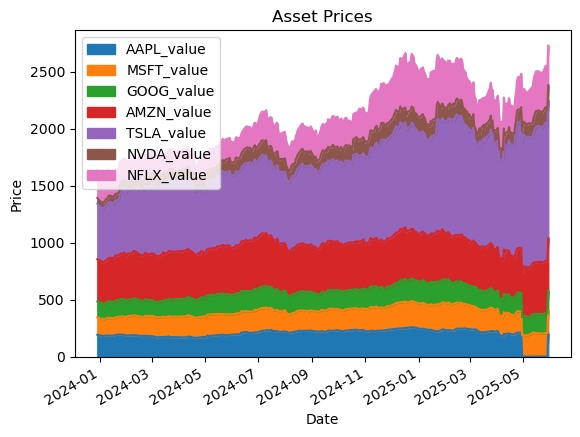

In [9]:
from plotter import plot_df_prices_components
plot_df_prices_components(val[cols_graph])

### Viz comparison

In [26]:
# Bring it all together for a 1.2 version. 
from data_fetch import get_price
from data_fetch import import_yf_df
from portfolio import Portfolio
from portfolio import get_closest_date_index
from plotter import plot_df_prices_components
from plotter import plot_df_prices_lines

import pandas as pd



shares = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'NFLX']
num_shares = [1, 1, 1, 1, 1, 1, 1] # Number of shares for each asset

#get price data with the API (yahoo finance)
#prices_df = get_price(shares)
#prices_df.to_csv('prices.csv', index=True)

#import csv data and clean it
prices_close_df = import_yf_df('prices.csv', shares)


valid_date_g = get_closest_date_index(pd.Timestamp('2023-12-31'), prices_close_df)  # Get the index of the closest date  # Get the first date from the DataFrame index
valid_date_s = get_closest_date_index(pd.Timestamp('2021-12-31'), prices_close_df)  # needto handle different dates for different portfolios
valid_date_w = get_closest_date_index(pd.Timestamp('2018-12-31'), prices_close_df)  # idem

stock_price_purchased = dict(prices_close_df.loc[pd.to_datetime(valid_date_g)])
portfolio_g = Portfolio('Gustavo', "M", {str(valid_date_g):{'AAPL': 10, 'MSFT': 10, 'GOOG': 10, 'AMZN': 10, 'TSLA': 10, 'NVDA': 10, 'NFLX': 10}}, stock_price_purchased, str(valid_date_g))
portfolio_s = Portfolio('Santiago', "S", {str(valid_date_s):{'AAPL': 8, 'MSFT': 10, 'GOOG': 12, 'AMZN': 5, 'TSLA': 14, 'NVDA': 4, 'NFLX': 15}}, stock_price_purchased, str(valid_date_s))
portfolio_w = Portfolio('Warren', "B", {str(valid_date_w):{'AAPL': 40, 'MSFT':60}}, stock_price_purchased, str(valid_date_w))

valid_date_g2 = get_closest_date_index(pd.Timestamp('2025-06-01'), prices_close_df)
stock_price_purchased2 = dict(prices_close_df.loc[pd.to_datetime(valid_date_g2)])  # Get the stock prices for the valid date
symbol2 = 'AAPL'
portfolio_g.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_s.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date
portfolio_w.add_asset(symbol2, 1, str(valid_date_g2), float(stock_price_purchased2[symbol2]))  # Add 1 share of AAPL at the price on the valid date

# Calculating portfolio value for each date in the test DataFrame
val_g = portfolio_g.get_portfolio_value(prices_close_df)
val_s = portfolio_s.get_portfolio_value(prices_close_df)
val_w = portfolio_w.get_portfolio_value(prices_close_df)

# Assuming val_g, val_s, and val_w are DataFrames with a "total value" column and the same index
comparison_df = pd.DataFrame({
    'Gus': val_g['Total_Value'],
    'Santiago': val_s['Total_Value'],
    'Warren': val_w['Total_Value']
})
# Display the joined DataFrame
comparison_df

#plot_df_prices_lines(comparison_df)


/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:140: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:140: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill to copy portfolio values to all dates until manually changed
/Users/gustavo/repos/repos_learning/python_course/python-coruse/Projects/backtester/portfolio.py:140: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill',

,Gus,Santiago,Warren
Date,,,
2018-12-31,NaN,NaN,6008.80
2019-01-02,NaN,NaN,6122.40
2019-01-03,NaN,NaN,5855.40
2019-01-04,NaN,NaN,6139.00
2019-01-07,NaN,NaN,6298.40
...,...,...,...
2025-05-23,26720.50,30068.76,19870.20
2025-05-27,27508.60,31000.42,20369.60
2025-05-28,27361.40,30830.36,20300.00


In [2]:
inv_df = pd.DataFrame({portfolio_g.full_name: portfolio_g.investment, 
              portfolio_s.full_name: portfolio_s.investment, 
              portfolio_w.full_name: portfolio_w.investment}).T
inv_df

,2023-12-29,2025-05-30
Gustavo M,16400.2,200.85
Santiago S,17332.3,200.85
Warren B,16761.6,200.85


In [3]:
capgain_df = pd.DataFrame({
              portfolio_g.full_name: portfolio_g.capital_gains, 
              portfolio_s.full_name: portfolio_s.capital_gains, 
              portfolio_w.full_name: portfolio_w.capital_gains}).T
capgain_df

,2023-12-29
Gustavo M,0
Santiago S,0
Warren B,0


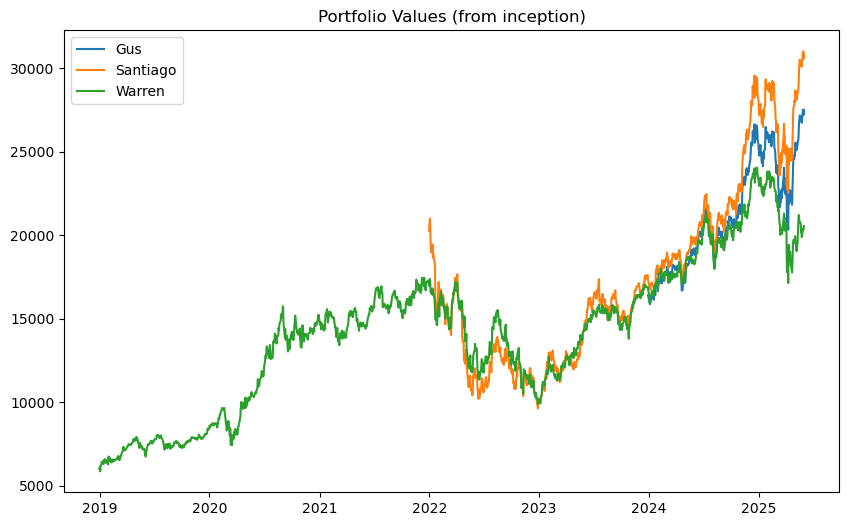

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(val_g.index, val_g['Total_Value'], label='Gus')
plt.plot(val_s.index, val_s['Total_Value'], label='Santiago')
plt.plot(val_w.index, val_w['Total_Value'], label='Warren')
plt.legend()
plt.title("Portfolio Values (from inception)")
plt.show()